# 支持向量机

## 支持向量

支持向量（Support Vectors）是支持向量机（SVM）算法中的重要概念。在二分类问题中，支持向量指的是位于类别边界或超平面上的训练样本。

支持向量机的目标是找到一个最优超平面，将不同类别的样本分开。这个超平面由一组特征权重（W）和一个截距（b）定义。在训练过程中，SVM算法会选择一部分训练样本作为支持向量，并利用它们来确定最优超平面的位置和方向。

支持向量具有以下特性：

* 它们是离超平面最近的样本点，可以看作是决策边界的“边界点”。
* 支持向量对于确定超平面的位置和方向非常关键，因为它们决定了超平面的间隔大小。
* 只有支持向量对于模型的训练和预测起作用，其他样本点对于模型没有影响。

在SVM算法中，通过最大化支持向量与超平面之间的间隔，以及根据支持向量的位置进行决策分类。在预测新的样本时，算法会将其与最近的支持向量进行比较，从而判断其所属类别。

支持向量的数量通常比训练样本的数量少得多，因此SVM算法在处理大规模数据时也具有较高的效率。

![](../../images/svm.jpg)

## 核函数

在支持向量机（SVM）中，核函数（kernel function）是一种用于将数据映射到高维特征空间的函数。核函数的作用是在原始特征空间中隐式地计算样本之间的相似性或内积，从而使非线性问题可以通过线性分类器进行处理。

核函数的关键思想是将低维空间中线性不可分的模式转换为高维空间中线性可分的模式。这种转换可以使SVM能够建立一个决策边界，将不同类别的样本正确地分开。通过引入核函数，我们无需直接计算高维特征空间，而只需计算低维空间中的核函数值。

常见的核函数包括：

* 线性核函数（linear kernel）：在原始特征空间中直接计算样本之间的内积。

$ \langle x, x'\rangle. $

* 多项式核函数（polynomial kernel）：将样本映射到多项式特征空间，通过计算多项式函数来度量样本之间的相似性。

$ (\gamma \langle x, x'\rangle + r)^d $. $d$ 是关键词 $degree$, $r$ 指定 $ coef0 $。

* 高斯核函数（Gaussian kernel），也称为径向基函数（Radial Basis Function，RBF）核函数：将样本映射到无限维的特征空间，通过计算样本之间的欧氏距离来度量相似性。

$\exp(-\gamma |x-x'|^2)$. $\gamma$ 是关键词 $gamma$, 必须大于 0。

* sigmoid核函数：将样本映射到双曲正切函数的特征空间，通过计算双曲正切函数来度量样本之间的相似性。

$(\tanh(\gamma \langle x,x'\rangle + r))$, 其中 $r$ 指定 coef0。

下面对比下几种方法：

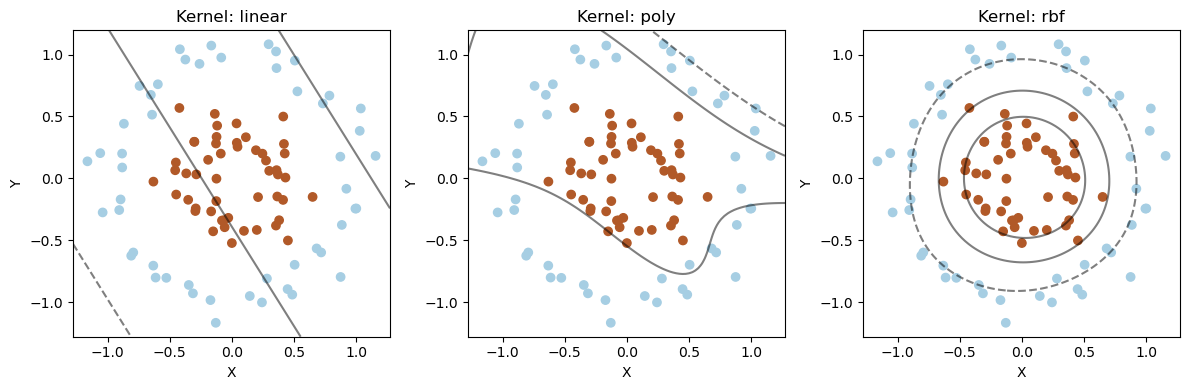

In [8]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 创建一个非线性的二维数据集
X, y = make_circles(n_samples=100, noise=0.1, factor=0.4, random_state=42)

# 定义不同核函数的名称和参数
kernels = ['linear', 'poly', 'rbf']
parameters = [{'C': 1}, {'degree': 3, 'C': 1}, {'gamma': 'scale', 'C': 1}]

# 绘制不同核函数的分类结果
plt.figure(figsize=(12, 4))
for i, kernel in enumerate(kernels):
    # 创建SVC模型并使用指定核函数进行训练
    model = SVC(kernel=kernel, **parameters[i])
    model.fit(X, y)
    
    # 在二维空间中绘制分类结果
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f"Kernel: {kernel}")
    
    # 绘制决策边界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
    
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

核函数就是让线性不可分升维后可分。
|线性不可分|线性可分|
|:-----|:-----|
|![](../../images/svm-linear-unseparable.jpg)|![](../../images/svm-linear-separable.jpg)|


也可以自定义核函数

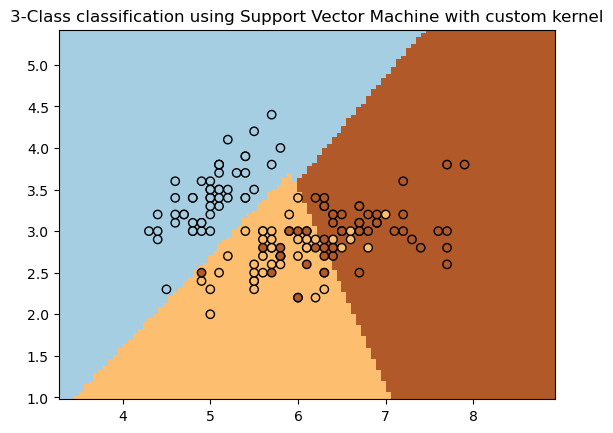

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

TODO 支持向量机的公式推导

## 多分类 OvO vs OvR
在多分类问题中，SVM支持两种常见的策略：One-vs-One（OvO）和One-vs-Rest（OvR）。它们之间的区别在于处理多个类别的方式。

One-vs-One和One-vs-Rest两种多分类策略的主要区别：

|          | One-vs-One (OvO)  | One-vs-Rest (OvR)  |
|----------|-------------------|--------------------|
| 模型数量 | N * (N-1) / 2     | N                  |
| 训练时间 | 较长              | 较短               |
| 内存消耗 | 较大              | 较小               |
| 样本数量 | 每个模型较少      | 每个模型较多       |
| 预测效果 | 可能更准确        | 简洁但可能稍差      |

在这个表格中，"N"表示类别的总数。
* One-vs-One策略需要构建更多的模型，训练时间更长，消耗更多的内存，但在某些情况下可能提供更准确的预测结果。
* One-vs-Rest策略只需要构建N个模型，训练时间和内存消耗较少，但预测结果可能相对简洁且略有不准确。

一般来说，当类别数量较少时，OvR策略可能更简洁有效。而当类别数量较多时，OvO策略可能更准确，但也需要更多的计算资源和时间。

从性能考虑，默认是OvR。

下面对比下这两种策略：

In [9]:
# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个SVC模型（使用one-vs-one策略）
model_ovo = SVC(decision_function_shape='ovo')
# 使用训练数据来训练模型
model_ovo.fit(X_train, y_train)
# 使用训练后的模型对测试数据进行预测
y_pred_ovo = model_ovo.predict(X_test)
# 计算预测准确率
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print("One-vs-One 准确率:", accuracy_ovo)

# 创建一个SVC模型（使用one-vs-rest策略）
model_ovr = SVC(decision_function_shape='ovr')
# 使用训练数据来训练模型
model_ovr.fit(X_train, y_train)
# 使用训练后的模型对测试数据进行预测
y_pred_ovr = model_ovr.predict(X_test)
# 计算预测准确率
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print("One-vs-Rest 准确率:", accuracy_ovr)

One-vs-One 准确率: 1.0
One-vs-Rest 准确率: 1.0



## SVC、NuSVC和LinearSVC

|        | SVC                | NuSVC                     | LinearSVC              |
|--------|--------------------|---------------------------|------------------------|
| 算法   | C-SVM              | ν-SVM                     | 线性SVM                |
| 核函数 | 可选择不同的核函数 | 可选择不同的核函数         | 不支持核函数           |
| 分类   | 二分类和多分类     | 二分类和多分类             | 仅线性可分问题         |
| 训练时间| 长                 | 较长                      | 较快                   |
| 大型数据集 | 适用           | 适用                      | 适用                   |

这个表格总结了SVC、NuSVC和LinearSVC三种算法的主要特点

* 如果问题是线性可分的并且需要较快的训练时间，可以选择LinearSVC。
* 如果问题是非线性的并且对支持向量的数量有一定灵活性要求，可以选择NuSVC。
* 如果问题是非线性的，并且希望可以选择不同的核函数，可以选择SVC。


In [10]:
# 导入必要的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个SVC模型
svc_model = SVC()
# 使用训练数据来训练SVC模型
svc_model.fit(X_train, y_train)
# 使用训练后的SVC模型对测试数据进行预测
svc_pred = svc_model.predict(X_test)
# 计算SVC模型的预测准确率
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVC 准确率:", svc_accuracy)

# 创建一个NuSVC模型
nusvc_model = NuSVC()
# 使用训练数据来训练NuSVC模型
nusvc_model.fit(X_train, y_train)
# 使用训练后的NuSVC模型对测试数据进行预测
nusvc_pred = nusvc_model.predict(X_test)
# 计算NuSVC模型的预测准确率
nusvc_accuracy = accuracy_score(y_test, nusvc_pred)
print("NuSVC 准确率:", nusvc_accuracy)

# 创建一个LinearSVC模型
linearsvc_model = LinearSVC()
# 使用训练数据来训练LinearSVC模型
linearsvc_model.fit(X_train, y_train)
# 使用训练后的LinearSVC模型对测试数据进行预测
linearsvc_pred = linearsvc_model.predict(X_test)
# 计算LinearSVC模型的预测准确率
linearsvc_accuracy = accuracy_score(y_test, linearsvc_pred)
print("LinearSVC 准确率:", linearsvc_accuracy)

SVC 准确率: 1.0
NuSVC 准确率: 1.0
LinearSVC 准确率: 1.0


/Users/xue/tool/anaconda3/envs/data-explore/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/xue/tool/anaconda3/envs/data-explore/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 非均衡问题

非均衡问题（Imbalanced problem）是指在分类问题中，不同类别的样本数量差异很大，其中一个类别的样本数量远远超过另一个类别。这种情况可能会导致模型对多数类别进行较好的预测，而对少数类别进行较差的预测。

解决非均衡问题的方法有很多，以下是一些常用的方法：

重采样（Resampling）：通过欠采样或过采样来平衡数据集中的类别数量。欠采样减少多数类别的样本数量，而过采样增加少数类别的样本数量。这些技术可以通过随机丢弃或复制样本来实现。

类别权重（Class weights）：在训练模型时，通过给少数类别分配更高的权重，使得模型在训练过程中更关注少数类别的分类效果。在大多数机器学习算法中，可以使用class_weight参数来设置类别权重。

算法调整（Algorithmic adjustments）：一些算法具有内置的处理非均衡数据集的功能，例如决策树算法中的代价敏感训练（Cost-Sensitive Training）。这些算法通过修改损失函数或调整决策阈值来改善少数类别的预测效果。

集成方法（Ensemble methods）：使用集成学习方法，如随机森林（Random Forest）或梯度提升树（Gradient Boosting），可以通过结合多个模型的预测结果来改善分类效果。在非均衡问题中，可以使用集成方法来平衡类别之间的预测差异。

生成合成样本（Generate synthetic samples）：一些算法可以生成合成的少数类别样本，以增加数据集中少数类别的样本数量。例如，SMOTE（Synthetic Minority Over-sampling Technique）算法可以通过插值生成新的少数类别样本。

下面绘制加权数据集的决策函数图，其中点的大小与其权重成比例。

> 样本加权会重新缩放C参数，这意味着分类器更加强调正确分类这些点。这种影响通常是微妙的。为了突出显示效果，在这里我们特别给异常值赋予更大的权重，使得决策边界的变形非常明显。

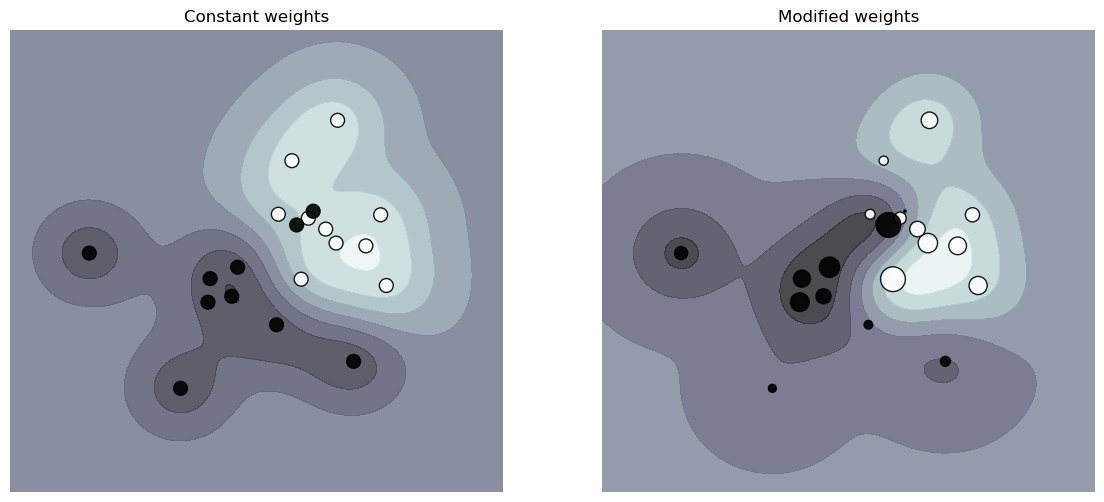

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

# 使用技巧

* 避免数据复制：确保数据以行优先存储（C-order）的双精度数组形式传递给SVC、SVR、NuSVC和NuSVR，避免不必要的数据复制。

* 内核缓存大小：对于大规模问题，增加内核缓存大小以提高性能，例如将其设置为500MB或1000MB。

* 设置惩罚系数C：根据实际情况调整惩罚系数C。较小的C值可以更好地对估计进行正则化。

* 数据标准化：对输入数据进行标准化，将其范围归一化到[0, 1]或[-1, +1]，或标准化为均值为0，方差为1的分布。确保相同的缩放标准应用于所有测试向量。

* 处理非均衡问题：对于非均衡数据集，可以尝试设置class_weight为’balanced’或调整惩罚系数C来平衡预测结果。

* 控制底层实现的随机性：通过设置random_state参数来控制SVC、NuSVC和LinearSVC底层实现中的随机性。

* 使用L1惩罚生成稀疏解：使用LinearSVC的L1惩罚来生成稀疏解，即特征权重的子集非零。调整C的值可以控制模型复杂度。